<a href="https://colab.research.google.com/github/guzvmarco/guzvmarco/blob/main/Copia_de_Copia_de_Teo_Fund_Calculo_para_IA_y_Ciencia_de_Datos%2C_Aplicacion_Marco_Guzman%2C_Victor_Cata%C3%B1o%2C_Ivan_Torres_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monitoreo de Entrenamiento de Redes Neuronales

Taller de aplicación | Fecha: 7 de octubre 2025

Profesor: Dr. Manuel David Morales

Nombre completo de cada alumno:


1.   Marco Guzman Vizcarra
2.   Victor Catano Nunez
3.   Osvaldo Ivan Torres Rodriguez



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumulative_trapezoid

# Configuración para mejores gráficos
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12

## Simulación de la Función de Pérdida

In [ ]:
# =============================================================================
# SIMULACIÓN DE LA FUNCIÓN DE PÉRDIDA DURANTE EL ENTRENAMIENTO
# =============================================================================

# Tiempo de entrenamiento (epochs o iteraciones)
time_steps = np.linspace(0, 100, 1000)  # 1000 puntos entre 0 y 100

# ----> Simulamos, con cautela, una función de pérdida típica

# 1. Decaimiento exponencial
decay_component = 2.0 * np.exp(-0.1 * time_steps)
# 2. Oscilaciones sinusoidales
oscillation_component = 0.3 * np.sin(0.5 * time_steps)
# 3- Ruido gaussiano
noise_component = 0.1 * np.random.normal(0, 1, len(time_steps))

# Función de pérdida combinada
loss_function = decay_component + oscillation_component + noise_component + 0.5

print("=== SIMULACIÓN DE ENTRENAMIENTO DE RED NEURONAL ===")
print(f"Tiempo simulado: {time_steps[0]:.1f} a {time_steps[-1]:.1f} epochs")
print(f"Pérdida inicial: {loss_function[0]:.3f}")
print(f"Pérdida final: {loss_function[-1]:.3f}")

#Segun nosotros se agrega el ruido para tomar en cuenta el componente de aleatoridad y el margen de error, entonces como no estamos seguro de la precision total, incluso de los datos antes de ser procesado,
#El tema de la osilacion es seno es para ver cuanto cambian los parametros, por la forma del seno, nos permite digamos que con los pesos, verlo en un punto minimo digamos w=1 y en un punto maximo digamos w+20, y la forma del seno nos permite observar como osilan los pesos en el tiempo, como van afectando el modelo


=== SIMULACIÓN DE ENTRENAMIENTO DE RED NEURONAL ===
Tiempo simulado: 0.0 a 100.0 epochs
Pérdida inicial: 2.374
Pérdida final: 0.312


**PREGUNTA 1**: ¿Por qué esta simulación para una función de pérdida típica debe tomarse con <i>cautela</i>? Apunta, quizás, a ciertas limitaciones? Discutir considerando las tres componentes que se incluyen la simulación.

**RESPUESTA:** Es importante tomar esto con cautela porque es excelente para describir la forma que tiene una curva de pérdida, pero no para simular el proceso dinámico que la crea.  El código es una descripción de la forma, no una simulación del proceso que la genera.

## Verificación del 1er Teorema

In [ ]:
# =============================================================================
# APLICACIÓN DEL PRIMER TEOREMA FUNDAMENTAL DEL CÁLCULO
# =============================================================================

print("\n=== APLICACIÓN DEL PRIMER TEOREMA ===")

# 1. CÁLCULO DE LA PÉRDIDA ACUMULADA (INTEGRAL)
# A(t) = ∫₀ᵗ L(τ)dτ - Representa el "esfuerzo total" de entrenamiento
dt = time_steps[1] - time_steps[0]  # Paso de tiempo
accumulated_loss = cumulative_trapezoid(loss_function, time_steps, initial=0)

print(f"Método de integración: Regla del trapecio acumulativa")
print(f"Paso de tiempo (dt): {dt:.3f}")
print(f"Pérdida acumulada total: {accumulated_loss[-1]:.3f}")

# 2. CÁLCULO DE LA TASA DE CAMBIO DE LA PÉRDIDA INSTANTÁNEA (DERIVADA)
# L(t) = dA/dt - Representa la tasa de cambio actual
instantaneous_loss = np.gradient(accumulated_loss, time_steps)

print(f"Tasa de pérdida instantánea promedio: {np.mean(instantaneous_loss):.3f}")


=== APLICACIÓN DEL PRIMER TEOREMA ===
Método de integración: Regla del trapecio acumulativa
Paso de tiempo (dt): 0.100
Pérdida acumulada total: 69.421
Tasa de pérdida instantánea promedio: 0.695


**PREGUNTA 2:** ¿En qué consiste la regla del trapecio acumulativa para integración numérica?

Ayuda: Revisar documentación de SciPy<br/>
https://www.google.com/url?q=https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.cumulative_trapezoid.html.

**RESPUESTA:** La regla del trapecio acumulativa es un método para calcular el área bajo una curva de forma progresiva
Es una técnica muy útil y común en ciencia y computación porque muchas veces no tenemos una fórmula matemática "bonita" para la integral, sino una serie de puntos de datos discretos


**PREGUNTA 3:** ¿Qué realiza, en general, el módulo <code>np.gradient</code>?

En esencia, np.gradient es una función que calcula la tasa de cambio o pendiente de un conjunto de datos en cada uno de sus puntos. Para lograrlo, en lugar de derivar una fórmula matemática, utiliza el método numérico de diferencias finitas, estimando la pendiente de cada punto al observar los valores de sus puntos vecinos (el anterior y el siguiente).


Sugerencia: Revisar documentación de NumPy<br/>
https://www.google.com/url?q=https://numpy.org/doc/2.3/reference/generated/numpy.gradient.html.

**RESPUESTA:** Escribir respuesta aquí.

In [ ]:
# =============================================================================
# VERIFICACIÓN DEL TEOREMA
# =============================================================================

print("\n=== VERIFICACIÓN DEL PRIMER TEOREMA ===")

# El teorema dice que: dA/dt debería ser igual a L(t)
# Comparamos la pérdida original con la derivada de la acumulada
error = np.abs(loss_function - instantaneous_loss)
max_error = np.max(error)
mean_error = np.mean(error)

print(f"Error máximo entre L(t) y dA/dt: {max_error:.6f}")
print(f"Error promedio: {mean_error:.6f}")

# Verificación cualitativa
teorema_cumplido = np.allclose(loss_function, instantaneous_loss, atol=0.1)
print(f"¿Se cumple el primer teorema? {teorema_cumplido}")


=== VERIFICACIÓN DEL PRIMER TEOREMA ===
Error máximo entre L(t) y dA/dt: 0.167659
Error promedio: 0.049984
¿Se cumple el primer teorema? False


**PREGUNTA 4:** Discute sobre los motivos por los cuales el primer teorema no se cumple.




**RESPUESTA:** El Primer Teorema Fundamental del Cálculo no se cumple de forma exacta en tu código por una razón fundamental: estás trabajando con aproximaciones numéricas, no con las operaciones matemáticas perfectas y continuas que el teorema asume. Tambien no se llega a cumplir por el ruido agregado, el ruido agarega cierto componente de aleatoridad y margen de error, el cual eliminando nos permite acercanos mas a cero pero es importante tener en cuenta que NO ES EXCACTO, pues siempre estamos trabajando con aproximaciones

## Visualizaciones gráficas

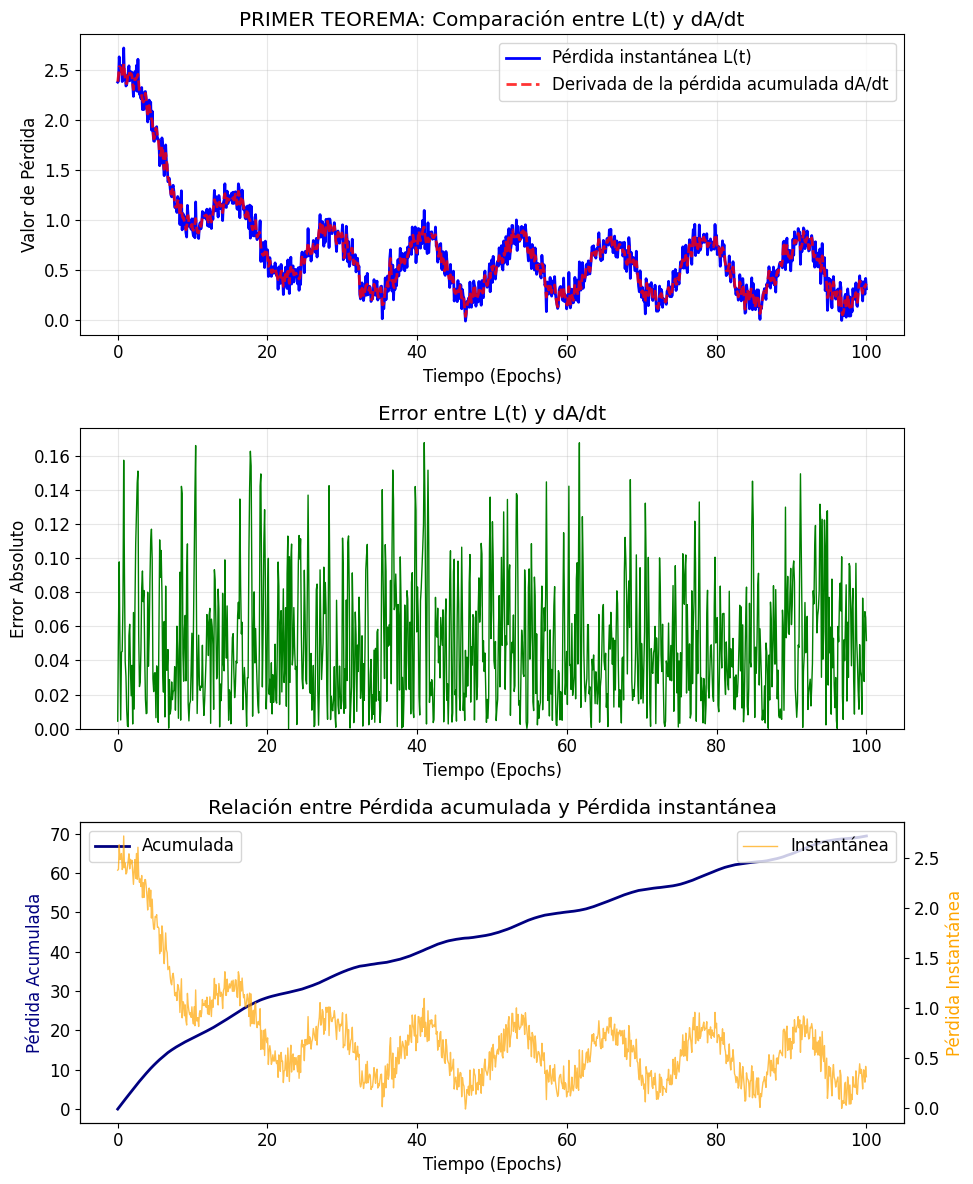

In [ ]:
# =============================================================================
# VISUALIZACIONES
# =============================================================================

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))

# Gráfico 1: Función de pérdida original vs derivada de la acumulada
ax1.plot(time_steps, loss_function, 'b-', linewidth=2,
         label='Pérdida instantánea L(t)')
ax1.plot(time_steps, instantaneous_loss, 'r--', linewidth=2,
         label='Derivada de la pérdida acumulada dA/dt', alpha=0.8)
ax1.set_ylabel('Valor de Pérdida')
ax1.set_xlabel('Tiempo (Epochs)')
ax1.set_title('PRIMER TEOREMA: Comparación entre L(t) y dA/dt')
ax1.legend()
ax1.grid(True, alpha=0.3)

print("")

# Gráfico 2: Error entre las dos curvas
ax2.plot(time_steps, error, 'g-', linewidth=1)
ax2.set_ylabel('Error Absoluto')
ax2.set_xlabel('Tiempo (Epochs)')
ax2.set_title('Error entre L(t) y dA/dt')
ax2.grid(True, alpha=0.3)
ax2.set_ylim(bottom=0)

print("")

# Gráfico 3: Pérdida acumulada vs. Pérdida instantánea
ax3.plot(time_steps, accumulated_loss, 'navy', linewidth=2, label='Acumulada')
ax3_twin = ax3.twinx()
ax3_twin.plot(time_steps, loss_function, 'orange', linewidth=1,
              label='Instantánea', alpha=0.7)
ax3.set_xlabel('Tiempo (Epochs)')
ax3.set_ylabel('Pérdida Acumulada', color='navy')
ax3_twin.set_ylabel('Pérdida Instantánea', color='orange')
ax3.set_title('Relación entre Pérdida acumulada y Pérdida instantánea')
ax3.legend(loc='upper left')
ax3_twin.legend(loc='upper right')

plt.tight_layout()
plt.show()

**PREGUNTA 5:** Para un monitoreo del entrenamiento en tiempo real, se requiere establecer algún criterio para detener, automáticamente, el entrenamiento (es decir, sin tener que definir de antemano el número de épocas). ¿Cómo lo harías? No es necesario codificar la solución, simplemente explica con palabras, como lo harías. Ayúdate de lo que observas en las gráficas.

**RESPUESTA:** Se puede crear un bucle para que se detenga cuando encuentre dos interaciones iguales o similares a las anteriores, cuando la variacion sea minima o inexistente, se pudiera detener vaya empezar una nueva iteracion de seno. Tambien se nos ocurre ver como el modelo se comporta y en que momento y con que datos empieza a ser "inutil", despues separar esos datos con los que ya esta aprendiendo.

**PREGUNTA 6:** Observa la tercera gráfica. ¿Que aspecto teórico, visto en clase, se podría verificar al explorar el intercambio (trade-off) entre la pérmida acumulada y la pérdida instantánea? Justifica tu respuesta.


**RESPUESTA:** Podemos ver la acumulada como la integral y la instantanea como la derivada, como inversas, de hecho, una aumenta cuando otra decrece, es un intercambio. Y en caso de calcularse el area bajo la curva, combinadas, podemos encontrar un monitoreo descriptivo, un valor. De hecho podemos ver que en todas las epocas, son las inversas. Cuando maticamente, encontramos operaciones inversas, encontramos un intercambio(trade off). En clase tambien se comento la idea de establecer un limite en el eje y.

## Métricas de entrenamiento

In [ ]:
# =============================================================================
# MÉTRICAS DE ANÁLISIS DEL ENTRENAMIENTO
# =============================================================================

print("\n=== MÉTRICAS DE ANÁLISIS DEL ENTRENAMIENTO ===")

# Encontrar puntos de interés
min_loss_idx = np.argmin(loss_function)
max_improvement_idx = np.argmin(instantaneous_loss)  # Donde la mejora es máxima

print(f"Mejor pérdida: {loss_function[min_loss_idx]:.4f} en epoch {time_steps[min_loss_idx]:.1f}")
print(f"Mejor tasa de mejora: {instantaneous_loss[max_improvement_idx]:.4f} en epoch {time_steps[max_improvement_idx]:.1f}")

# Calcular métricas de convergencia
final_quarter = len(loss_function) // 4
loss_std_final = np.std(loss_function[-final_quarter:])
improvement_rate = (loss_function[0] - loss_function[-1]) / loss_function[0]

print(f"Estabilidad final (std): {loss_std_final:.6f}")
print(f"Tasa de mejora total: {improvement_rate*100:.1f}%")


=== MÉTRICAS DE ANÁLISIS DEL ENTRENAMIENTO ===
Mejor pérdida: -0.2999 en epoch 97.4
Mejor tasa de mejora: -0.2997 en epoch 97.4
Estabilidad final (std): 0.212651
Tasa de mejora total: 103.9%


**PREGUNTA 7 (optativa, para reemplazar algunas de las anteriores):** ¿A qué nos referimos, conceptualmente, por "estabilidad final" del entrenamiento? En la práctica, un valor de 0.234788 es alto, y ciertamente problemático, para esta métrica. Discute posibles escenarios que, en la práctica, pudieran explicar el por qué este valor es alto.

**RESPUESTA:** Nos referimos a que tan equilibrado esta el modelo en respecto a las variaciones y fluctaciones producidad por error o ruido, al final de su entrenamiento. O incluso se puede verificar quitando el final. Entendemos que son formas varias. Por ejemplo el codigo, calcula la desviacion standard de la loss function y despues quita su ultimo cuarto para medir lo que paso en el proceso sin tener en cuenta el sesgo del modelo al final de su entrenamiento.

En si, la estabilidad final delata a un modelo que no alcanza el equilibro en su entrenamiento. Puede tener datos ruidos o inconsientes y valores atipicos, lo cual afecta gravemente al modelo si esos datos son incluidos de forma aleatoria en el entrenamiento. Pero tambien es una buena metrica para detectar esa falta de equilibrio y actuar ante ello.

## Conclusiones finales

In [ ]:
# =============================================================================
# INTERPRETACIÓN PRÁCTICA PARA IA
# =============================================================================

print("\n" + "="*60)
print("INTERPRETACIÓN PARA ENTRENAMIENTO DE REDES NEURONALES")
print("="*60)

print("""
PÉRDIDA INSTANTÁNEA L(t):
- Representa cuán bien está performing el modelo en el momento actual
- Guía las actualizaciones de los pesos de la red neuronal en cada iteración
- Si L(t) decrece indica que el modelo está aprendiendo

PÉRDIDA ACUMULADA A(t):
- Representa el "esfuerzo total" de entrenamiento
- Puede ser útil para comparar diferentes ejecuciones de entrenamiento
- Ayuda a decidir cuándo parar el entrenamiento

PRIMER TEOREMA FUNDAMENTAL DEL CÁLCULO EN ACCIÓN:
- La derivada de la pérdida acumulada ≈ pérdida instantánea
- Esto significa que la tasa de cambio del "esfuerzo total"
  se aproxima, numéricamente, al rendimiento actual
- Establece una conexión fundamental entre comportamiento local y global
""")



INTERPRETACIÓN PARA ENTRENAMIENTO DE REDES NEURONALES

PÉRDIDA INSTANTÁNEA L(t):
- Representa cuán bien está performing el modelo en el momento actual
- Guía las actualizaciones de los pesos de la red neuronal en cada iteración
- Si L(t) decrece indica que el modelo está aprendiendo

PÉRDIDA ACUMULADA A(t):
- Representa el "esfuerzo total" de entrenamiento
- Puede ser útil para comparar diferentes ejecuciones de entrenamiento
- Ayuda a decidir cuándo parar el entrenamiento

PRIMER TEOREMA FUNDAMENTAL DEL CÁLCULO EN ACCIÓN:
- La derivada de la pérdida acumulada ≈ pérdida instantánea
- Esto significa que la tasa de cambio del "esfuerzo total"
  se aproxima, numéricamente, al rendimiento actual
- Establece una conexión fundamental entre comportamiento local y global



**TAREA PRÁCTICA:**

Observación: Esta tarea práctica se calificará de forma independiente a las preguntas anteriores.

Indificaciones: Copiar este script, guardarlo con otro nombre, y en esa copia modificarlo para simular y analizar dos escenarios diferentes de entrenamiento. Responder, claramente, a las preguntas que se plantean.

Escenario 1: Entrenamiento Inestable

In [ ]:
# Simular inestabilidad agregando ruido significativo
unstable_loss = loss_function + 0.5 * np.random.normal(0, 1, len(time_steps))

PREGUNTA 8:


*   Cómo cambia la verificación del teorema fundamental?
*   ¿Qué patrones observan en la relación entre pérdida acumulada e instantánea?
*   ¿Qué métricas adicionales podrían ayudar a detectar esta inestabilidad?

Escenario 2: Entrenamiento con Learning Rate Alto

In [ ]:
# Simular oscilaciones por LR muy alto
high_lr_loss = loss_function + 0.8 * np.sin(2 * time_steps)  # Oscilaciones rápidas

Preguntas guía:

*   ¿Cómo se manifiesta visualmente el problema del learning rate alto?
*   ¿La relación del teorema fundamental se mantiene a pesar de las oscilaciones?
*   ¿Qué información proporciona la pérdida acumulada en este caso?